In [16]:
import pandas as pd
import numpy as np
import phate
import scprep
import os
import scanpy as sc
import anndata

# matplotlib settings for Jupyter notebooks only
%matplotlib inline


In [4]:
download_path = '/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/PHATE_data'
sparse=True
T1 = scprep.io.load_10X(os.path.join(download_path, "scRNAseq", "T0_1A"), sparse=sparse, gene_labels='both')
T2 = scprep.io.load_10X(os.path.join(download_path, "scRNAseq", "T2_3B"), sparse=sparse, gene_labels='both')
T3 = scprep.io.load_10X(os.path.join(download_path, "scRNAseq", "T4_5C"), sparse=sparse, gene_labels='both')
T4 = scprep.io.load_10X(os.path.join(download_path, "scRNAseq", "T6_7D"), sparse=sparse, gene_labels='both')
T5 = scprep.io.load_10X(os.path.join(download_path, "scRNAseq", "T8_9E"), sparse=sparse, gene_labels='both')
T1.head()

,RP11-34P13.3 (ENSG00000243485),FAM138A (ENSG00000237613),OR4F5 (ENSG00000186092),RP11-34P13.7 (ENSG00000238009),RP11-34P13.8 (ENSG00000239945),RP11-34P13.14 (ENSG00000239906),RP11-34P13.9 (ENSG00000241599),FO538757.3 (ENSG00000279928),FO538757.2 (ENSG00000279457),AP006222.2 (ENSG00000228463),...,AC007325.2 (ENSG00000277196),BX072566.1 (ENSG00000277630),AL354822.1 (ENSG00000278384),AC023491.2 (ENSG00000278633),AC004556.1 (ENSG00000276345),AC233755.2 (ENSG00000277856),AC233755.1 (ENSG00000275063),AC240274.1 (ENSG00000271254),AC213203.1 (ENSG00000277475),FAM231B (ENSG00000268674)
0,,,,,,,,,,,,,,,,,,,,,
AAACATACCAGAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAAAGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGAAGTGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGGAGGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACATTGGTTTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='Library size', ylabel='Number of cells'>

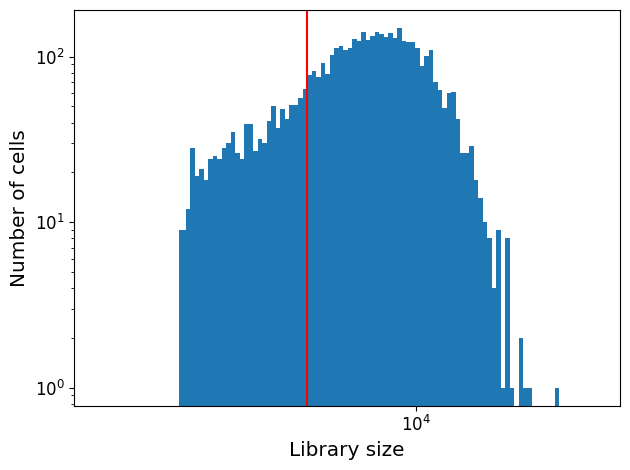

In [5]:
scprep.plot.plot_library_size(T1, percentile=20)

In [6]:
filtered_batches = []
for batch in [T1, T2, T3, T4, T5]:
    batch = scprep.filter.filter_library_size(batch, percentile=20, keep_cells='above')
    batch = scprep.filter.filter_library_size(batch, percentile=75, keep_cells='below')
    filtered_batches.append(batch)
del T1, T2, T3, T4, T5 # removes objects from memory

In [7]:
EBT_counts, sample_labels = scprep.utils.combine_batches(
    filtered_batches, 
    ["Day 00-03", "Day 06-09", "Day 12-15", "Day 18-21", "Day 24-27"],
    append_to_cell_names=True
)
del filtered_batches # removes objects from memory
EBT_counts.head()

,A1BG (ENSG00000121410),A1BG-AS1 (ENSG00000268895),A1CF (ENSG00000148584),A2M (ENSG00000175899),A2M-AS1 (ENSG00000245105),A2ML1 (ENSG00000166535),A2ML1-AS1 (ENSG00000256661),A2ML1-AS2 (ENSG00000256904),A3GALT2 (ENSG00000184389),A4GALT (ENSG00000128274),...,ZXDC (ENSG00000070476),ZYG11A (ENSG00000203995),ZYG11B (ENSG00000162378),ZYX (ENSG00000159840),ZZEF1 (ENSG00000074755),ZZZ3 (ENSG00000036549),bP-21264C1.2 (ENSG00000278932),bP-2171C21.3 (ENSG00000279501),bP-2189O9.3 (ENSG00000279579),hsa-mir-1253 (ENSG00000272920)
AAACATTGAAAGCA-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGCAGAAA-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCGTGGAAGGC-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCACCGGTAT-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCACCTATTC-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
EBT_counts = scprep.filter.filter_rare_genes(EBT_counts, min_cells=10)

In [9]:
EBT_counts = scprep.normalize.library_size_normalize(EBT_counts)

<Axes: xlabel='Gene expression', ylabel='Number of cells'>

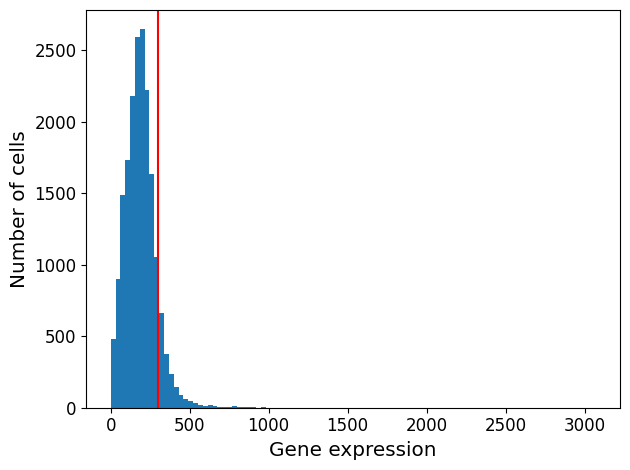

In [10]:
mito_genes = scprep.select.get_gene_set(EBT_counts, starts_with="MT-") # Get all mitochondrial genes. There are 14, FYI.
scprep.plot.plot_gene_set_expression(EBT_counts, genes=mito_genes, percentile=90)

In [11]:
EBT_counts, sample_labels = scprep.filter.filter_gene_set_expression(
    EBT_counts, sample_labels, genes=mito_genes, 
    percentile=90, keep_cells='below')

In [12]:
EBT_counts = scprep.transform.sqrt(EBT_counts)

In [13]:
phate_operator = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)
Y_phate = phate_operator.fit_transform(EBT_counts)

Calculating PHATE...
  Running PHATE on 16821 observations and 17845 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 27.38 seconds.
    Calculating KNN search...
    Calculated KNN search in 62.27 seconds.
    Calculating affinities...
    Calculated affinities in 68.03 seconds.
  Calculated graph and diffusion operator in 159.07 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.25 seconds.
    Calculating KMeans...
    Calculated KMeans in 12.38 seconds.
  Calculated landmark operator in 18.16 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.55 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.39 seconds.
Calculated PHATE in 184.19 seconds.


<Axes: xlabel='PHATE1', ylabel='PHATE2'>

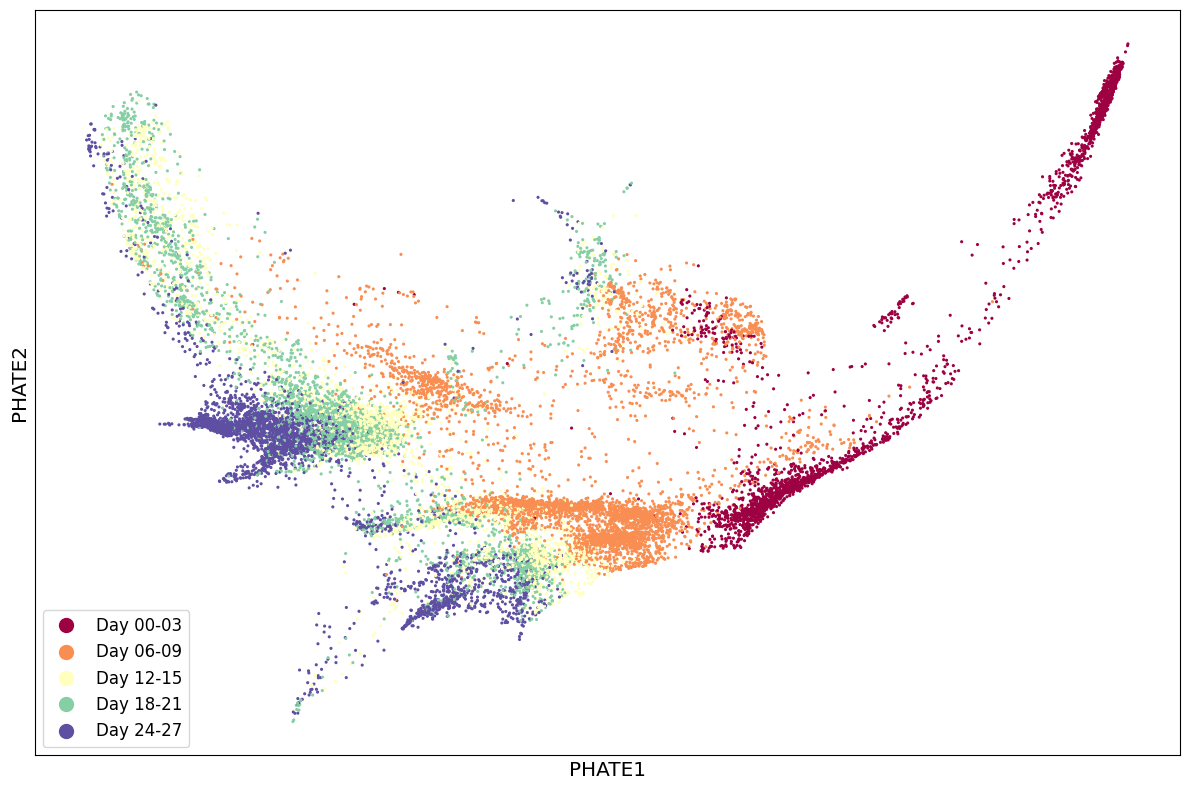

In [14]:
scprep.plot.scatter2d(Y_phate, c=sample_labels, figsize=(12,8), cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

In [17]:
eb_data = anndata.AnnData(X=EBT_counts, obs=pd.DataFrame(index=EBT_counts.index), var=pd.DataFrame(index=EBT_counts.columns))

In [22]:
eb_data.obsm['X_phate'] = Y_phate

In [23]:
eb_data.obs['sample_labels'] = sample_labels

In [32]:
eb_data.write_h5ad('../data/eb.h5ad')

In [24]:
sc.pp.highly_variable_genes(eb_data)

In [30]:
eb_data_hv = eb_data[:,eb_data.var['highly_variable']]

In [31]:
eb_data_hv

View of AnnData object with n_obs × n_vars = 16821 × 1684
    obs: 'sample_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_phate'

In [33]:
phate_operator2 = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)
Y_phate2 = phate_operator2.fit_transform(eb_data_hv.X)

Calculating PHATE...
  Running PHATE on 16821 observations and 1684 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 3.73 seconds.
    Calculating KNN search...
    Calculated KNN search in 78.53 seconds.
    Calculating affinities...
    Calculated affinities in 109.71 seconds.
  Calculated graph and diffusion operator in 192.68 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 13.21 seconds.
    Calculating KMeans...
    Calculated KMeans in 6.57 seconds.
  Calculated landmark operator in 23.22 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.56 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.39 seconds.
Calculated PHATE in 222.87 seconds.


<Axes: xlabel='PHATE HVG1', ylabel='PHATE HVG2'>

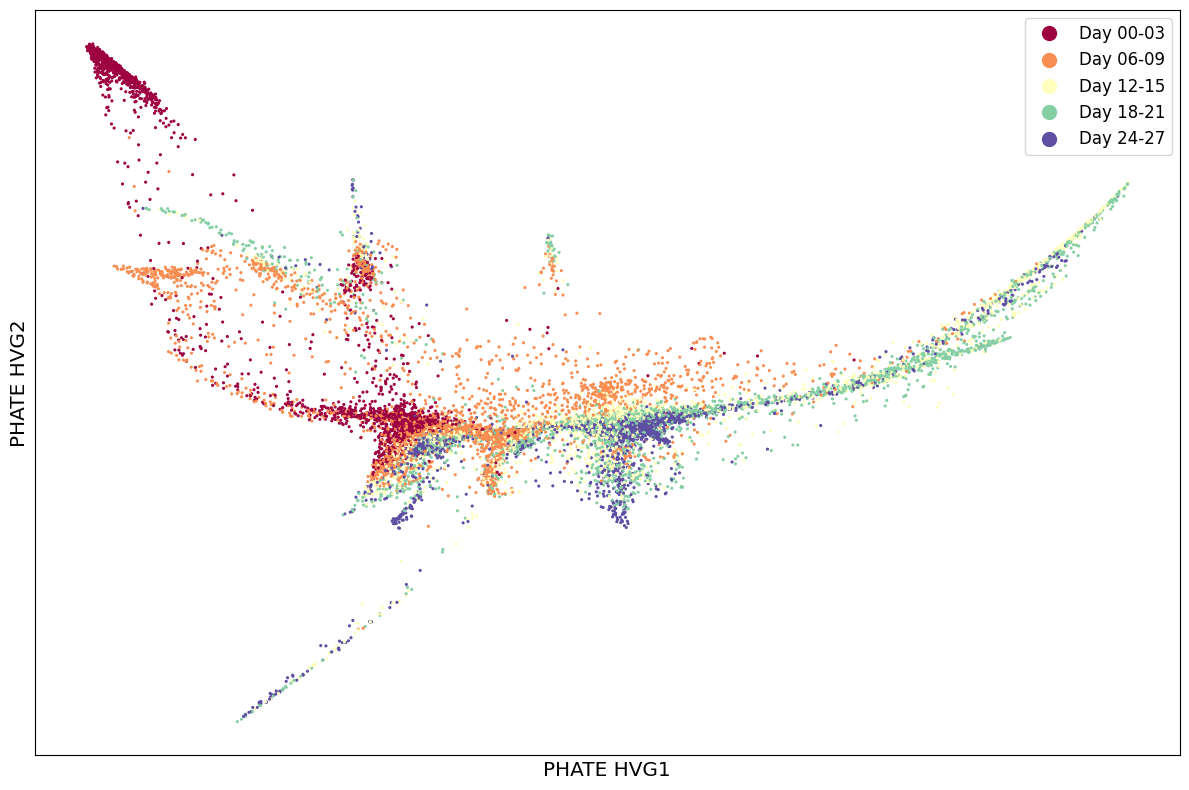

In [34]:
scprep.plot.scatter2d(Y_phate2, c=sample_labels, figsize=(12,8), cmap="Spectral",
                      ticks=False, label_prefix="PHATE HVG")

In [35]:
sc.tl.pca(eb_data_hv, svd_solver='arpack', n_comps=50)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


In [36]:
phate_operator3 = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)
Y_phate3 = phate_operator3.fit_transform(eb_data_hv.obsm['X_pca'])

Calculating PHATE...
  Running PHATE on 16821 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 31.06 seconds.
    Calculating affinities...
    Calculated affinities in 19.92 seconds.
  Calculated graph and diffusion operator in 51.14 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.95 seconds.
    Calculating KMeans...
    Calculated KMeans in 7.23 seconds.
  Calculated landmark operator in 12.87 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.55 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 5.42 seconds.
Calculated PHATE in 70.99 seconds.


<Axes: xlabel='PHATE HVG PCA1', ylabel='PHATE HVG PCA2'>

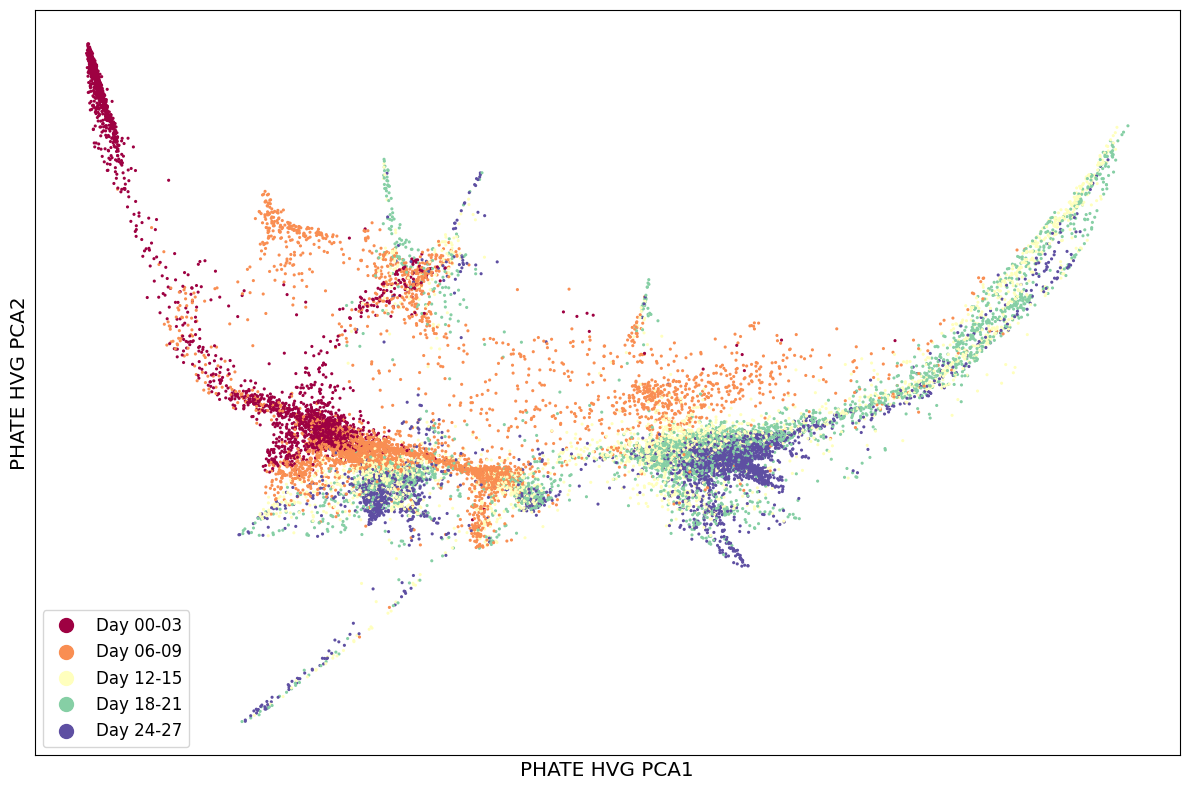

In [37]:
scprep.plot.scatter2d(Y_phate3, c=sample_labels, figsize=(12,8), cmap="Spectral",
                      ticks=False, label_prefix="PHATE HVG PCA")

In [38]:
sc.write('../data/eb_hv.h5ad', eb_data_hv)

In [40]:
np.save('../data/eb_hv_pca.npy', eb_data_hv.obsm['X_pca'])

In [43]:
np.random.seed(42)
subset_id = np.random.choice(eb_data_hv.shape[0], size=3000, replace=False)
X_pca_subset = eb_data_hv.obsm['X_pca'][subset_id,:]

In [44]:
phate_operator4 = phate.PHATE(knn=4, decay=15, t=12, n_jobs=-2)
Y_phate4 = phate_operator4.fit_transform(X_pca_subset)

Calculating PHATE...
  Running PHATE on 3000 observations and 50 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 1.38 seconds.
    Calculating affinities...
    Calculated affinities in 1.64 seconds.
  Calculated graph and diffusion operator in 3.10 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.91 seconds.
    Calculating KMeans...
    Calculated KMeans in 7.42 seconds.
  Calculated landmark operator in 10.03 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.58 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 8.44 seconds.
Calculated PHATE in 24.17 seconds.


<Axes: xlabel='PHATE HVG PCA1', ylabel='PHATE HVG PCA2'>

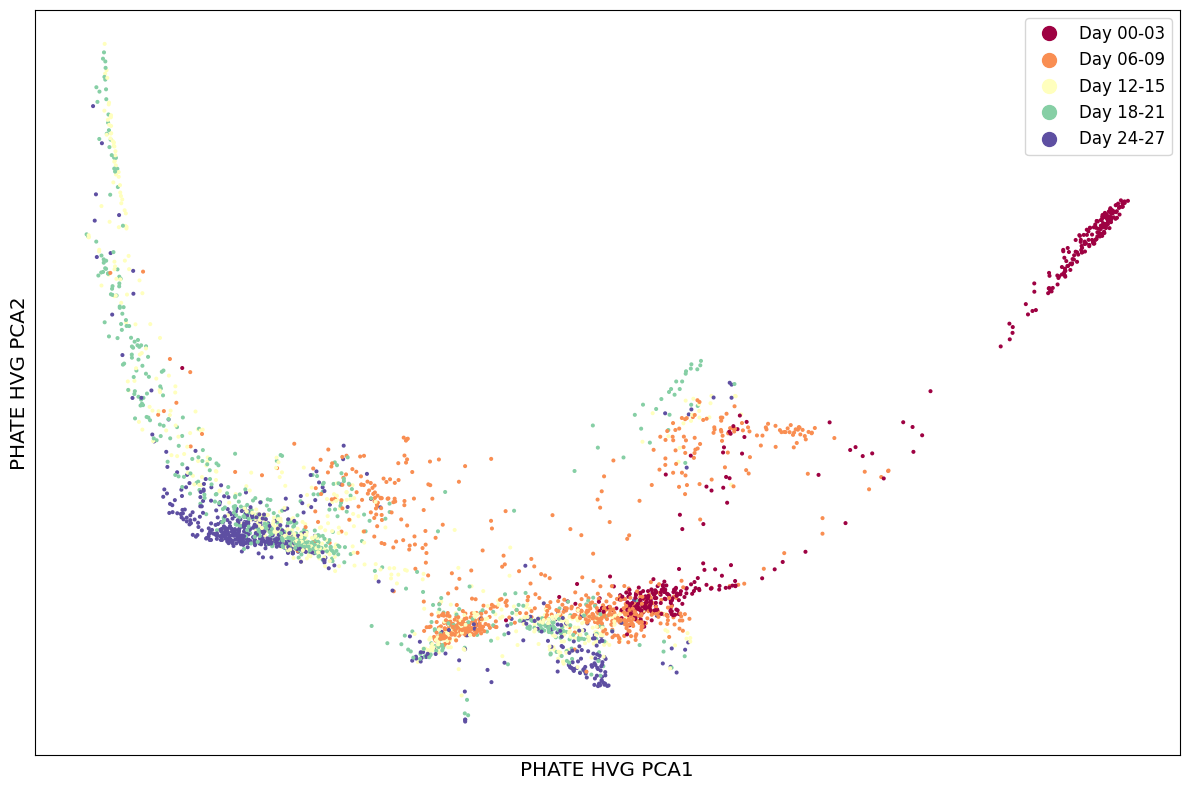

In [45]:
scprep.plot.scatter2d(Y_phate4, c=sample_labels[subset_id], figsize=(12,8), cmap="Spectral",
                      ticks=False, label_prefix="PHATE HVG PCA")

In [46]:
np.save('../data/eb_hv_pca_subset.npy', X_pca_subset)